## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 3: Real Analysis
## Due 23 October, 2019 at 6:00 PM
### <span style="color: red">Kevin Egedy</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

In [13]:
# Imports
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 3. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of Real Analysis, for example covered in the book [An Introduction to Real Analysis](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/intro_analysis.html). You do not need to read all of this book (although doing so would be great), but you should at least read the following sections.
  - [Chapter 3](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch3.pdf), Sections 3.2, 3.3, and 3.4. You can skip the proofs if you want to. 
  - [Chapter 6](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch6.pdf), Sections 6.1 and 6.3.
  - [Chapter 7](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch7.pdf), Sections 7.1, 7.2, and 7.6.
  - [Chapter 8](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch8.pdf), Sections 8.1, 8.2, 8.3, 8.5, 8.6, and 8.8.
  - [Chapter 11](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch8.pdf), Sections 11.1, 11.2, and 11.5.
  
  
-  <span style="color: #F5793A;">**Warning:** My notes attempt to make sure no concepts require other concepts that were not yet covered. However, if you just skim the above, you will likely encounter definitions that use other definitions in sections I did not suggest you read.</span>
- If the textbook above is not clear to you, you might try looking at alternative textbooks, such as the [one by Jiri Lebl](https://www.jirka.org/ra/realanal.pdf).
- If you would like to buy a textbook on real analysis, here are a few:
  - [Rudin](https://www.amazon.com/Principles-Mathematical-Analysis-International-Mathematics/dp/007054235X). Very concise. 
  - [Strichartz](https://www.amazon.com/Analysis-Revised-Jones-Bartlett-Mathematics/dp/0763714976/ref=sr_1_1?keywords=Strichartz%27s+book+%22The+way+of+analysis&qid=1570552954&s=books&sr=1-1). Gentler.
  - [Kolmogorov](https://www.amazon.com/Introductory-Analysis-Dover-Books-Mathematics/dp/0486612260/ref=sr_1_1?keywords=Kolmogorov+real+analysis&qid=1570553008&s=books&sr=1-1). A classic!

### 1. Sequences

For each of the patterns below, define a formula for $n$th term $x_n$ of the sequence. Also, plot the first 20 terms of the sequences. Combine all three plots into a figure using the subplot command. Label everything.

a) 5,7,9,11,...

b) 1/2, 2/3, 3/4, 4/5, ...

c) 1/2, -1/4, 1/8, -1/16, ...



The formula for sequence 5,7,9,11,... is 
$$x_n = 2n + 5 .$$

The formula for sequnece 1/2, 2/3, 3/4, 4/5, ... is 
$$x_n = \frac{n+1}{n+2} .$$

The formula for sequence 1/2, -1/4, 1/8, -1/16, ... is
$$x_n = \frac{(-1)^{n}}{2^{n+1}} .$$

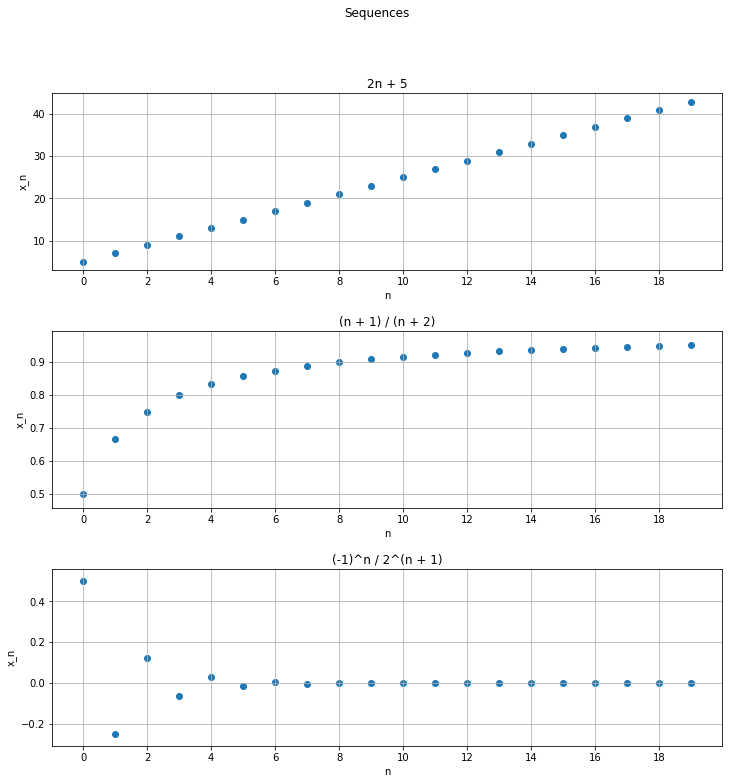

In [2]:
# Define Sequences
seq0 = lambda n: 2*n+5
seq1 = lambda n: (n+1)/(n+2)
seq2 = lambda n: ((-1)**n)/(2**(n+1))
N = 20
n = np.arange(0,N)

# matplotlib
fig,axs = plt.subplots(3,1, figsize=(12,12))
plt.subplots_adjust(hspace=0.35)
fig.suptitle('Sequences')

# Sequence0
axs[0].scatter(n,seq0(n),label='2n + 5')
axs[0].set_title('2n + 5')
axs[0].set_xlabel('n')
axs[0].set_ylabel('x_n')
axs[0].set_xticks(np.arange(0,N,2))
axs[0].grid(True)

# Sequence1
axs[1].scatter(n,seq1(n),label='(n + 1)/(n + 2)')
axs[1].set_title('(n + 1) / (n + 2)')
axs[1].set_xlabel('n')
axs[1].set_ylabel('x_n')
axs[1].set_xticks(np.arange(0,N,2))
axs[1].grid(True)

# Sequence2
axs[2].scatter(n,seq2(n),label='( (-1)^n )/( 2^(n + 1)')
axs[2].set_title('(-1)^n / 2^(n + 1)')
axs[2].set_xlabel('n')
axs[2].set_ylabel('x_n')
axs[2].set_xticks(np.arange(0,N,2))
axs[2].grid(True);

### 2. Sequence Convergence

Show that the following sequence limits using either an $\varepsilon-\delta$ argument or **Thm 1** from the lecture notes. 

a) $\lim \frac{3n+1}{2n+5} = \frac{3}{2}$

b) $\lim \frac{2n}{n+2} = 2$

c) $\lim\left(\frac{1}{n} - \frac{1}{n+1} \right) = 0$

<hr>

**References**<br> 
**Limit Definition:** <br>Let $X = (x_n)$ be a sequence. $x$ is a **limit** of $X$ if for every $\varepsilon > 0$ there exists $K(\varepsilon) \in \mathbb{N}$ such that for all $n \geq K(\varepsilon)$, 

  $$
  x - \varepsilon < x_n < x + \varepsilon
  $$ or
  $$ 
  |x_n-x| \lt \varepsilon.
  $$
  
In this case we write $\lim x_n = x$ and say that $x_n$ converges to $x$.
<br>

**Thm 1:** <br>
Let $(a_n)$ and $(x_n)$ be sequences with $\lim a_n = 0$ and let $x \in \mathbb{R}$. If for some $C > 0$ and some $m > 0$ it is the case that

$$
\left |x_n - x \right | \leq C\left |a_n\right |
$$

for all $n > m$, then $\lim x_n = x$. 
<hr>

$$\lim \frac{3n+1}{2n+5} = \frac{3}{2}$$
- $\left |x_n - x \right | \leq C\left |a_n\right | $


$$\lim \frac{2n}{n+2} = 2$$
- $x_n = , \epsilon = $

$$\lim\left(\frac{1}{n} - \frac{1}{n+1} \right) = 0$$
- $x_n = , \epsilon = $

### 3. Proving non-convergence

Show that the sequence $(x_n)$ where $x_n = (-1)^n$ does not converge to any number $c$. Use the definition of limit for sequences. Given $\varepsilon > 0$ you have to show that there does not exist an $m$ such that for all $n>m$ such that $c-\varepsilon < x_n < c+\varepsilon$. 

### 4. Sequences via recurrence relations

Let $x_0 = 1$ and $x_{i+1} = - a x_i$ where $0 < a < 1$.

a) Plot the first 20 points in $(x_n)$ when $a=\frac{1}{2}$. 

b) Show that $(x_n)$ converges to 0. 

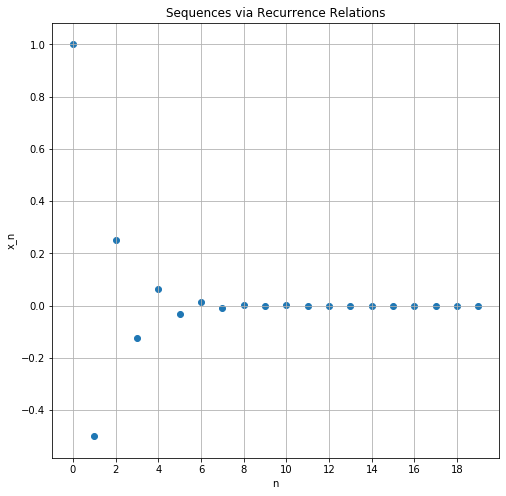

In [3]:
# Define Sequence

def relation_sequences(n):
    '''
    Returns the sequence where x_{i+1} = -ax_i where x_0 is 1 and a = 1/2.
    '''
    a = 1/2
    x0 = 1
    arr = [x0]
    def relation(arr,i):
        '''Returns x_{i+1} = -ax_i'''
        if i == 1: 
            return arr
        else:
            x_prev = arr[-1]
            arr.append(-a*x_prev)
            return relation(arr,i-1)
    return relation(arr,n)

# matplotlib
N = 20
X = relation_sequences(N)
n = range(0,N)
fig,ax = plt.subplots(figsize=(8,8))
plt.scatter(n,X)
plt.title('Sequences via Recurrence Relations')
plt.xlabel('n')
plt.ylabel('x_n')
plt.xticks(np.arange(0,N,2))
plt.grid(True);

$(x_n)$ converges to 0. 
Explain!

### 5. Continuous Functions

Define the function $s$ by

$$
s(x) = \left \{
\begin{array}{ll}
-1 & \mathrm{if}\;x<0 \\
0 & \mathrm{if}\;x = 0 \\
1 & \mathrm{if}\;x > 0
\end{array}
\right .
$$

a) Find a sequence $(x_n)$ converges to $0$ but where $(s(x_n))$ does not converge. Conclude that $s$ is not continuous at $0$. 

b) Show that $s$ is continuous at all other points in $\mathbb{R}$.

### 6. Mean Value Theorem

Suppose $f'(x) \geq 0$ for all $x$. Use the intermediate value theorem to show that if $x_1 \leq x_2$, then $f(x_1) \leq f(x_2)$. 

### 7. Finding Roots Using the Bisection Method

Write a function that implements the "bisection method" for finding the roots of function. The signature of your function should look like

```python
def find_root(f,a,b,n):
```
where $n$ is the maximum number of iterations of to search for the root.

The code should follow this algorithm:

- We are given a continuous function $f$ and numbers $a$ and $b$ and with $a < b$ with $f(a) < 0 < f(b)$. From the intermediate value theorem we know that there exists a $c$ with $a<c<b$ with $f(c) = 0$. We want to find $c$.

- Set $a_1 = a$ and $b_1 = b$ and $m = \frac{1}{2}(a+b)$. 

- For $i = 1$ to $n$ do
    - If $f(m) = 0$, then $c = m$ so break and return $m$.
    - Else If $f(m) > 0$ then set $a_{i+1} = a_i$ and $b_{i+1} = m$.
    - Else If $f(m) < 0$, then set $a_{i+1} = m_i$ and $b_{i+1} = b_i$.


- Return m

Test on several examples, including one in which the first 'if' statement is true, and another where it is never true. Check your work by plotting the results.

In [4]:
def find_root(f,a,b,n):
    '''
    Implements the "bisection method" for finding the roots of a function.
    f : continuous function
    a : start of interval
    b : end of interval
    n : maximum number of iterations
    '''
    m = (1/2)*(a+b)
    A = [a]
    B = [b]
    M = [m]
    c = None
    x = np.arange(a-5,b+5,0.1)
    
    # Plot continuous function f
    fig,ax = plt.subplots(figsize=(8,8))    
    plt.plot(x,f(x))
    plt.plot(x,np.zeros(len(x)),color='C0')
    plt.title('Roots of a Continuous Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    # Check conditions hold
    if (a>b): tmp=b;b=a;a=tmp
    if f(a)>f(b): raise Exception('continuous function must follow f(a) < 0 < f(b)')
    if f(a)>0: raise Exception('continuous function must follow f(a) < 0')
    if f(b)<0: raise Exception('continuous function must follow f(b) > 0')
    
    # Bisection Method
    for i in range(1,n+1):
        a_prev,b_prev = A[-1],B[-1]
        m = (1/2)*(a_prev+b_prev)
        plt.scatter(a_prev,f(a_prev),color='green',marker='o')
        plt.scatter(b_prev,f(b_prev),color='red',marker='o')
        if f(m) == 0:
            c = m
            break
        elif f(m) > 0:
            A.append(a_prev)
            B.append(m)
        else:
            A.append(m)
            B.append(b_prev)
    plt.show()
    return m

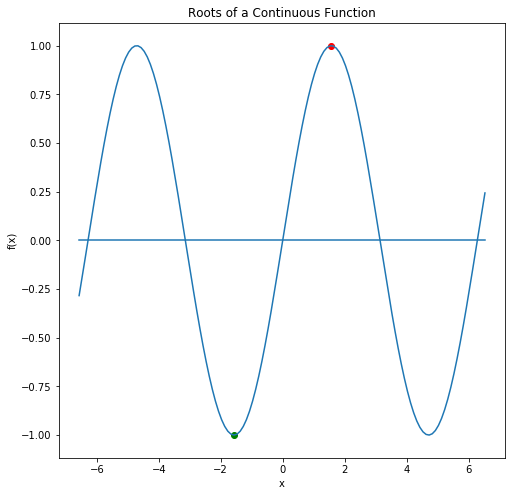

0.0

In [5]:
find_root(np.sin,-1/2*np.pi,1/2*np.pi,7)

Exception: continuous function must follow f(a) < 0 < f(b)

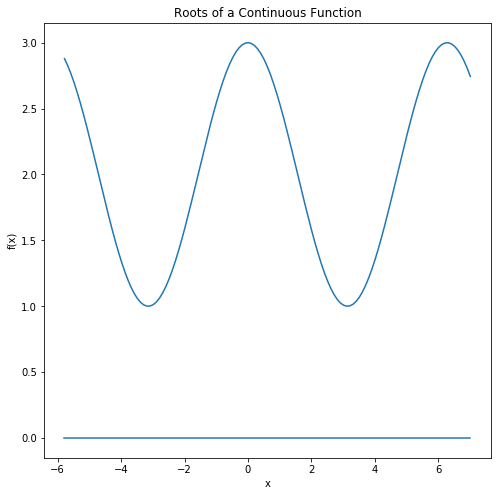

In [6]:
mycos = lambda x: np.cos(x)+2
find_root(mycos,-1/4*np.pi,2/3*np.pi,7)

### 8. Definition of Derivative

Use the definition of the derivative to find the derivatives of the following functions.

a) $f(x) = x^3$, for any $x$

b) $g(x) = 1/x$, for $x \neq 0$

c) $h(x) = \sqrt{x}$, for $x > 0$

d) $k(x) = x^{-1/2}$ for $x > 0$.

The derivative of $f(x) = x^3$, for any $x$ is
\begin{eqnarray}
f'(c) & = & \lim_{x \rightarrow c} \frac{f(x) - f(c)}{x-c} \\
      &   &                                                \\
f'(c) & = & \lim_{x \rightarrow c} \frac{x^3 - c^3}{x-c}   \\
      &   &                                                \\
f'(c) & = & \lim_{x \rightarrow c} \frac{(x-c)(x^2+xc+c^2)}{x-c} \\
      &   &                                                \\
f'(c) & = & \lim_{x \rightarrow c} x^2+xc+c^2 = 3c^2       \\
      &   &                                                \\
f'(x) & = & 3x^2
\end{eqnarray}
<hr>

The derivative of $g(x) = 1/x$, for $x \neq 0$ is 
\begin{eqnarray}
g'(c) & = & \lim_{x \rightarrow c} \frac{g(x) - g(c)}{x-c} \\
      &   &  \\
g'(c) & = & \lim_{x \rightarrow c} \frac{\frac{1}{x} - \frac{1}{c}}{x-c} \\
      &   &  \\
g'(c) & = & \lim_{x \rightarrow c} \frac{\frac{c-x}{xc}}{x-c} \\
      &   &  \\
g'(c) & = & \lim_{x \rightarrow c} \frac{x-c}{-xc} \frac{1}{x-c} \\
      &   &  \\
g'(c) & = & \lim_{x \rightarrow c} \frac{1}{-xc} = \frac{-1}{c^2} \\
      &   &  \\
g'(x) & = & \frac{-1}{x^2}
\end{eqnarray}
<hr>

The derivative of $h(x) = \sqrt{x}$, for $x > 0$ is
\begin{eqnarray}
h'(c) & = & \lim_{x \rightarrow c} \frac{h(x) - h(c)}{x-c} \\
      &   &  \\
h'(c) & = & \lim_{x \rightarrow c} \frac{\sqrt{x}-\sqrt{c}}{x-c} \cdot
      \frac{\sqrt{x}+\sqrt{c}}{\sqrt{x}+\sqrt{c}} \\
      &   &  \\
h'(c) & = & \lim_{x \rightarrow c} \frac{x-c}{(x-c)(\sqrt{x}+\sqrt{c})} \\
      &   &  \\
h'(c) & = & \lim_{x \rightarrow c} \frac{1}{\sqrt{x}+\sqrt{c}}  = \frac{1}{2\sqrt{c}} \\
      &   &  \\
h'(x) & = & \frac{1}{2\sqrt{x}}
\end{eqnarray}
<hr>

The derivative of $k(x) = x^{-1/2}$ for $x > 0$ is 
\begin{eqnarray}
k'(c) & = & \lim_{x \rightarrow c} \frac{k(x) - k(c)}{x-c} \\
      &   & \\
k'(c) & = & \lim_{x \rightarrow c} \frac{x^{\frac{-1}{2}} - c^{\frac{-1}{2}}}{x-c} \cdot
      \frac{x^{\frac{-1}{2}} + c^{\frac{-1}{2}}}{x^{\frac{-1}{2}} + c^{\frac{-1}{2}}} \\
      &   &  \\
k'(c) & = & \lim_{x \rightarrow c} \frac{x^{-1}-c^{-1}}
      {(x-c)(x^{\frac{-1}{2}} + c^{\frac{-1}{2}})} \\
      &   &  \\
k'(c) & = & \lim_{x \rightarrow c} \frac{\frac{x-c}{-xc}}
      {(x-c)(x^{\frac{-1}{2}} + c^{\frac{-1}{2}})} \\
      &   &  \\
k'(c) & = & \lim_{x \rightarrow c} \frac{-1}{(xc)(x^{\frac{-1}{2}} + c^{\frac{-1}{2}})} =
            \lim_{x \rightarrow c} \frac{-1}{cx^{\frac{1}{2}} + xc^{\frac{1}{2}}}\\
      &   &  \\
k'(c) & = & \frac{-1}{c^{\frac{3}{2}} + c^{\frac{3}{2}}} = 
      \frac{-1}{2c^{\frac{3}{2}}}\\
      &   &  \\
k'(x) & = & (\frac{-1}{2})x^{\frac{-3}{2}}
\end{eqnarray}
<hr>

### 9. The Chain Rule

Use the chain rule to find these deriviatives. Verify your results with `sympy`.

a) $f(x) = \frac{1}{1+x^2}$

b) $h(x) = (\sin x^k)^m$ for $m,k \in \mathbb{N}$

<hr>

**Definition**

$$
(g \circ f)'(x) = g'(f(x)) \cdot f'(x).
$$

<hr>

The derivative of $f(x) = \frac{1}{1+x^2}$ is evaulated as <br>
- Let $h(x) = 1+x^2$ and $k(x) = \frac{1}{x}$ <br><br>
- $h'(x) = 2x$ and $k'(x) = \frac{-1}{x^2}$ <br><br>
- then $(\frac{1}{1+x^2})' = k'(h(x)) \cdot h'(x)$ <br><br>
- Sustitute expressions:$\frac{-1}{(1+x^2)^2} \cdot 2x$ <br><br>
- $f'(x) = \frac{-2x}{(1+x^2)^2}$

In [7]:
# sympy derivative
x = sp.symbols("x")
f = 1/(1+x**2)
Df = sp.diff(f,x)
Df

-2*x/(x**2 + 1)**2

The derivative of $h(x) = (\sin x^k)^m$ for $m,k \in \mathbb{N}$ is evaluated as <br>
- Execute the chain rule twice <br><br>
- Let $f(x) = x^k$ and $g(x) = \sin{x}$ then <br><br>
    - solve again where $c(x) = \sin{x^k}$ and $d(x) = x^m$ <br><br>
- $f'(x) = kx^{k-1}$ and $g'(x) = \cos{x}$ <br><br>
- $(\sin{x^k})' = \cos(x^{k}) \cdot kx^{k-1}$ <br><br>
- Remaining term, $d'(x) = mx^{m-1}$<br><br>
- Substitute into $d'(c(x)) \cdot c'(x) = m(\sin{x^k})^{m-1} \cdot kx^{k-1}\cos(x^{k})$ <br><br>
- Refactor $ kmx^{k-1}\cos(x^{k})\sin(x^k)^{m-1} = kmx^{k}x^{-1}\cos(x^k)\sin(x^k)^m \sin(x^k)^{-1} $ <br><br>
- $h'(x) = \frac{kmx^{k}\cos(x^k)\sin(x^k)^m}{x\sin(x^k)}$

In [8]:
# sympy derivative
x,k,m = sp.symbols("x k m")
h = sp.sin(x**k)**m
Dh = sp.diff(h,x)
Dh

k*m*x**k*sin(x**k)**m*cos(x**k)/(x*sin(x**k))

### 10. The Mean Value Theorem

Use the mean value theorem to show that $|\sin x - \sin y| \leq |x-y|$ for all $x,y \in \mathbb{R}$. 

Visualize this problem with a plot.

The mean value theorem of $|\sin x - \sin y| \leq |x-y|$ for all $x,y \in \mathbb{R}$ is __
$$ .$$

In [9]:
# matplotlib

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)/(1+R)

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, cmap='Blues_r')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');


### 11. Taylor Approxmations

Use `sympy` to find the Taylor Approximations to $\sin x$ with 1 term, 2 terms, 3 terms, all the way up to 6 terms. Ignore the remainder term. Plot all of these approximations along with $\sin x$ on the same plot, showing the approximations get better and better. 

<hr>

**Taylor Approximation**

$$
f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + ... 
     + \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n
     + \frac{f^{(n+1)}(c)}{(n+1)!}(x-x_0)^{n+1}
$$

<hr>

In [10]:
# Taylor Series Approximations for sin(x)

def taylor_power_approx(f,n):
    '''
    Returns n (non-zero) terms in taylor series approximation of f 
    Assumes n > 0 and f is a continuous function dependent upon 1 variable
    '''
    apprx = []
    x = f.free_symbols.pop()
    x0 = sp.symbols("x0")
    f = f.subs(x,x0)
    term = f.subs(x0,0) #chose approximation around x = 0
    if term != 0: apprx.append(term)
    def next_term(apprx,f,i,n):
        if len(apprx) == n:
            return apprx
        else:
            term = sp.diff(f)*((x-x0)**(i+1)/sp.factorial(i+1))
            term = term.subs(x0,0)
            if term != 0: apprx.append(term)
            return next_term(apprx,sp.diff(f),i+1,n)
    apprx = next_term(apprx,f,0,n)
    print(apprx)
    return sp.lambdify(x,sum(apprx),'numpy')

x = sp.symbols("x")
sin1 = taylor_power_approx(sp.sin(x),1)
sin2 = taylor_power_approx(sp.sin(x),2)
sin3 = taylor_power_approx(sp.sin(x),3)
sin4 = taylor_power_approx(sp.sin(x),4)
sin5 = taylor_power_approx(sp.sin(x),5)
sin6 = taylor_power_approx(sp.sin(x),6);

[x]
[x, -x**3/6]
[x, -x**3/6, x**5/120]
[x, -x**3/6, x**5/120, -x**7/5040]
[x, -x**3/6, x**5/120, -x**7/5040, x**9/362880]
[x, -x**3/6, x**5/120, -x**7/5040, x**9/362880, -x**11/39916800]


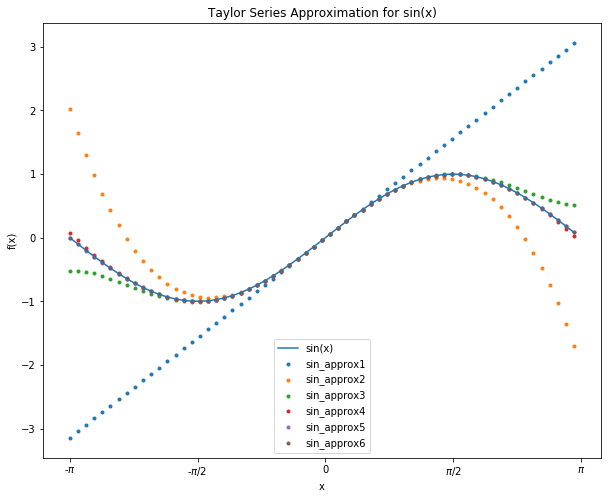

In [12]:
# matplotlib
n = np.arange(-np.pi,np.pi,0.1)
f = np.sin

fig,ax = plt.subplots(figsize=(10,8))    
plt.plot(n,f(n),label='sin(x)')
plt.scatter(n,sin1(n),marker='.',label='sin_approx1')
plt.scatter(n,sin2(n),marker='.',label='sin_approx2')
plt.scatter(n,sin3(n),marker='.',label='sin_approx3')
plt.scatter(n,sin4(n),marker='.',label='sin_approx4')
plt.scatter(n,sin5(n),marker='.',label='sin_approx5')
plt.scatter(n,sin6(n),marker='.',label='sin_approx6')
plt.xticks(np.pi * np.array([-1,-1/2,0,1/2,1]))
ax.set_xticklabels(["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Taylor Series Approximation for sin(x)')
plt.legend();

In [11]:
def taylor_approx(f,n):
    '''
    Returns n terms in taylor series approximation of f 
    '''
    apprx = []
    x = f.free_symbols.pop()
    x0 = sp.symbols("x0")
    f = f.subs(x,x0)
    term = f.subs(x0,0) #chose approximation around x = 0
    apprx.append(term)
    def next_term(apprx,f,i,n):
        if len(apprx) == n:
            return apprx
        else:
            term = sp.diff(f)*((x-x0)**(i+1)/sp.factorial(i+1))
            term = term.subs(x0,0)
            apprx.append(term)
            return next_term(apprx,sp.diff(f),i+1,n)
    apprx = next_term(apprx,f,0,n)
    print(apprx)
    return sp.lambdify(x,sum(apprx),'numpy')


x = sp.symbols("x")
#sin1 = taylor_approx(sp.sin(x),1)
#sin2 = taylor_approx(sp.sin(x),2)
#sin3 = taylor_approx(sp.sin(x),3)
#sin4 = taylor_approx(sp.sin(x),4)
#sin5 = taylor_approx(sp.sin(x),5)
#sin6 = taylor_approx(sp.sin(x),6);

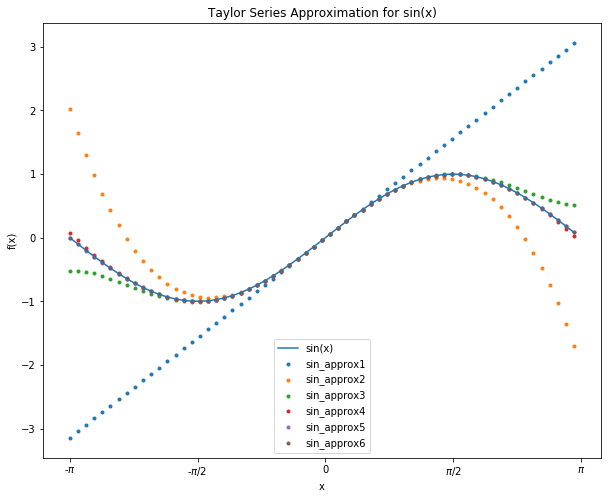

In [12]:
# matplotlib
n = np.arange(-np.pi,np.pi,0.1)
f = np.sin

fig,ax = plt.subplots(figsize=(10,8))    
plt.plot(n,f(n),label='sin(x)')
plt.scatter(n,sin1(n),marker='.',label='sin_approx1')
plt.scatter(n,sin2(n),marker='.',label='sin_approx2')
plt.scatter(n,sin3(n),marker='.',label='sin_approx3')
plt.scatter(n,sin4(n),marker='.',label='sin_approx4')
plt.scatter(n,sin5(n),marker='.',label='sin_approx5')
plt.scatter(n,sin6(n),marker='.',label='sin_approx6')
plt.xticks(np.pi * np.array([-1,-1/2,0,1/2,1]))
ax.set_xticklabels(["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Taylor Series Approximation for sin(x)')
plt.legend();

### 12. Showing Inequalities With Taylor's Approximation.

Show that if $x>0$ then $1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x} \leq 1 + \frac{1}{2}x$. Hint, break this into two steps, one for each inequality. For the first step, use the first three terms of the Taylor approximation and a residual term that is cubic. For the second inequality, use the first two terms of the Taylor approximation and a residual term that is a square. Make sure to explain each step of your argument.

How good is this approximation for $\sqrt{2}$? How about $\sqrt{3}$? 

Visualize this problem by making a plot showing the relationship of the three expressions as $x$ increases.

### 13. L'Hospital's Rule

Find expressions whose limits exist and correspond to each of the cases $0/0$, $\infty/\infty$, and $0^0$. Use `sympy` to evaluate these limits to show that it knows how to use L'Hospital's rule.

### 14. Integral Approximation

a) Consider the function $f(x) = \sin(x) / x$ over the domain $[1,9]$. Make a plot similar to the following that shows how to approximate the function with a set of $n = 20$ rectangles. The rectangles should have width $dx = (b-a)/n$ and heights $f(a), \; f(a+dx), \; f(a+2dx), \dots$. 

![integral-approx](https://raw.githubusercontent.com/klavins/EE502P/master/imgaes/integral-approx.png)

b) Write a Python function that takes a function `f`, a starting point `a`, an ending point `b`, and a positive integer `n` and returns the approximation of the integral $\int_a^b f(x)dx$ that uses $n$ rectangles as defined in part (a). The signature of your function should look like

```python
def approx(f,a,b,n):
```

Demonstrate your function with the $f$ in part (a). 

c) Make a plot of `approx(f,a,b,n)` for $n = 1 \; \mathrm{to} \; 100$. Use `sympy` to evaluate the actual integral. To which value of $n$ is the integral accurate to 5 decimal places?

d) Use your function to make successive approximations to the integral $\int_0^1 \frac{1}{x} dx$ for $n=1$ to $20$, illustrating that the sequence does not converge.  

In [ ]:
def approx(f,a,b,n):
    '''
    Returns
    f : continuous function
    a : starting point
    b : ending point
    n : number of rectangles
    '''
    x = f.free_symbols.pop()